In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib nbagg

df = pd.read_csv(r'C:\Users\20190814\OneDrive - TU Eindhoven\Desktop\TUE\Tue Year 1\Q4 Tue\WEB-TECH\Project\dataset.csv', encoding = 'latin1', sep='\t')

mask_map = df["StimuliName"] == "01_Antwerpen_S1.jpg"
df_final = df[mask_map]


In [7]:
mask_users_p_all = df_final["user"] == "p1"
df_all = df_final[mask_users_p_all]
df_all_copy = df_all.copy()
df_all_copy["distanceX"] = df_all_copy["MappedFixationPointX"].diff(-1)*(-1)
df_all_copy["distanceY"] = df_all_copy["MappedFixationPointY"].diff(-1)*(-1)

df_all_copy["distanceX"].fillna(0)

df_all_copy["distanceX"].reset_index(drop=True, inplace=True)
df_all_copy["distanceY"].reset_index(drop=True, inplace=True)
df_all_copy["MappedFixationPointX"].reset_index(drop=True, inplace=True)
df_all_copy["MappedFixationPointY"].reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>


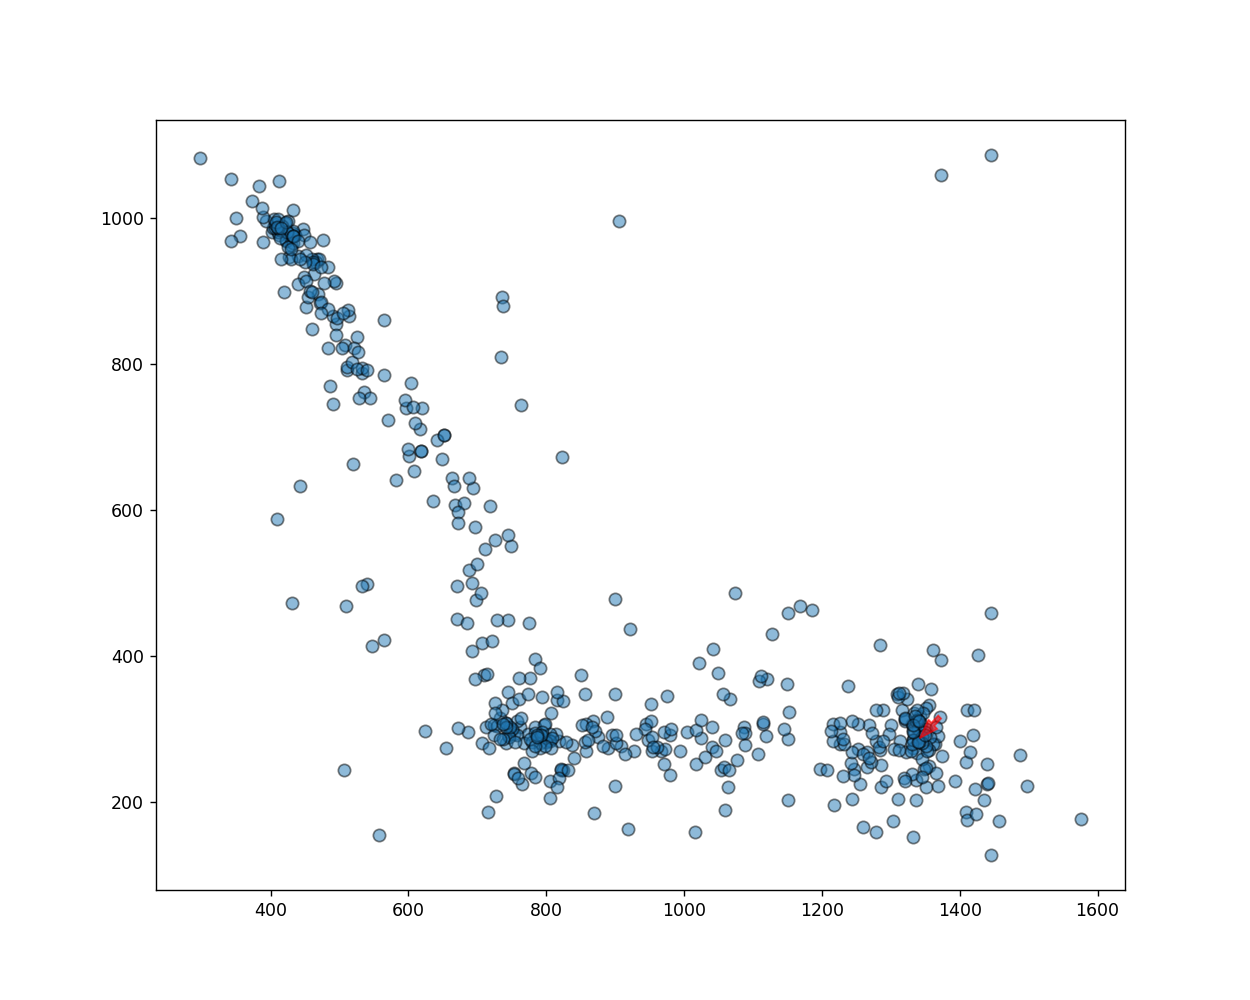

interactive(children=(IntSlider(value=1, description='arrows: ', max=13), Output()), _dom_classes=('widget-int…

In [14]:
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.scatter(df_final["MappedFixationPointX"], df_final["MappedFixationPointY"], s=50, cmap='viridis', alpha=0.5, edgecolor='k')
# ax.arrow(df_all_copy["MappedFixationPointX"].loc[0], df_all_copy["MappedFixationPointY"].loc[0], df_all_copy["distanceX"].loc[0], df_all_copy["distanceY"].loc[0], width=6, color="red", length_includes_head=True, alpha=0.6)
# ax.arrow(df_all_copy["MappedFixationPointX"].loc[1], df_all_copy["MappedFixationPointY"].loc[1], df_all_copy["distanceX"].loc[1], df_all_copy["distanceY"].loc[1], width=6, color="red", length_includes_head=True, alpha=0.6)

def update_plot(arrowing):
    ax.clear()
    ax.scatter(df_final["MappedFixationPointX"], df_final["MappedFixationPointY"], s=50, cmap='viridis', alpha=0.5, edgecolor='k')
    ax.arrow(df_all_copy["MappedFixationPointX"].loc[arrowing], df_all_copy["MappedFixationPointY"].loc[arrowing], df_all_copy["distanceX"].loc[arrowing], df_all_copy["distanceY"].loc[arrowing], width=6, color="red", length_includes_head=True, alpha=0.6)
    plt.show()

#widgets
arrowing = widgets.IntSlider(min=0, max=13, value=1, description="arrows: ")

widgets.interactive(update_plot, arrowing=arrowing)

<IPython.core.display.Javascript object>


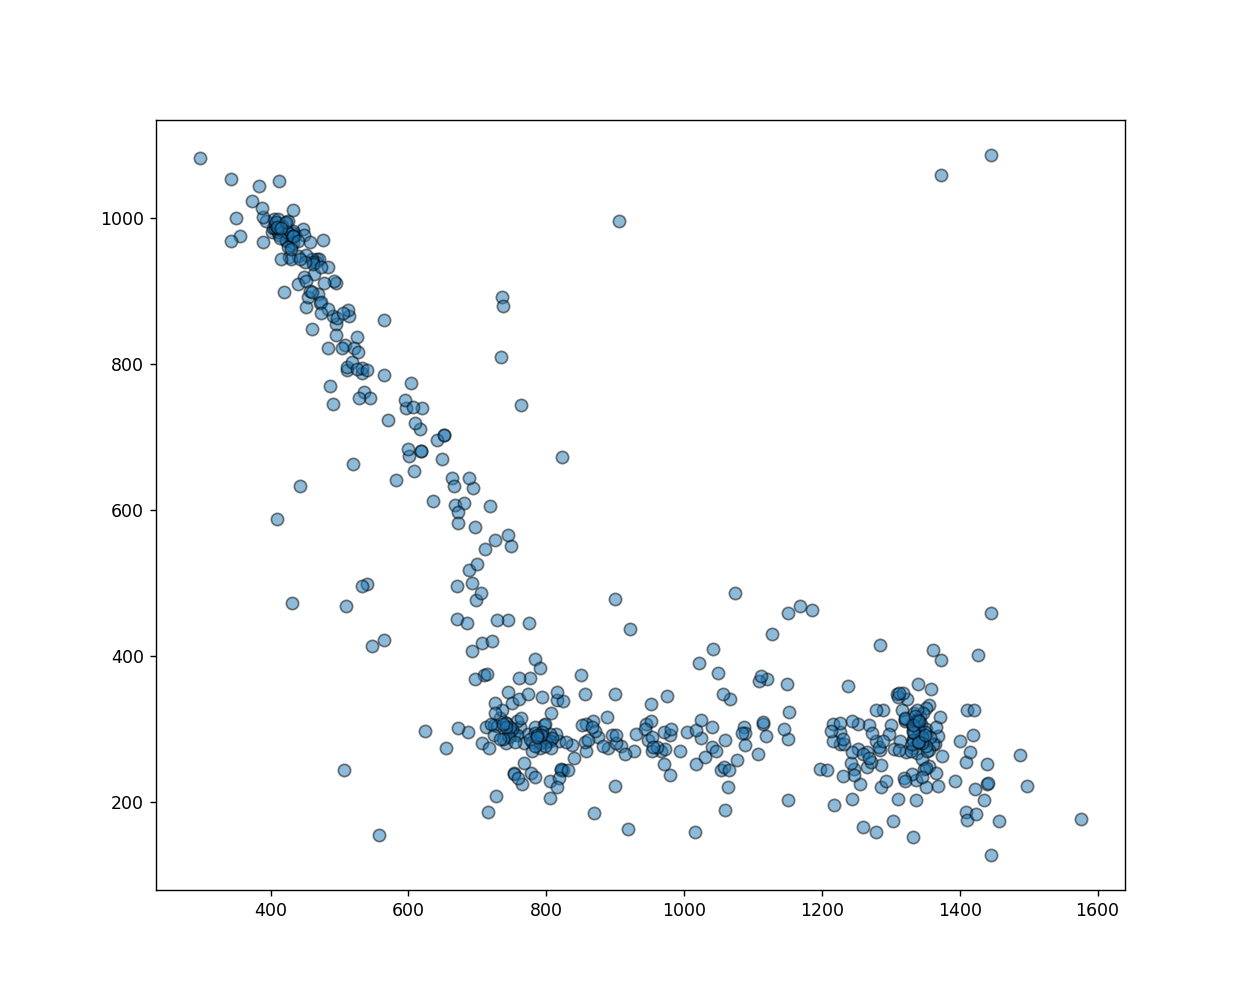

IntSlider(value=1, description='users scanpath: ', max=80)

In [9]:
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.scatter(df_final["MappedFixationPointX"], df_final["MappedFixationPointY"], s=50, cmap='viridis', alpha=0.5, edgecolor='k')
# ax.arrow(df_all_copy["MappedFixationPointX"].loc[0], df_all_copy["MappedFixationPointY"].loc[0], df_all_copy["distanceX"].loc[0], df_all_copy["distanceY"].loc[0], width=6, color="red", length_includes_head=True, alpha=0.6)
# ax.arrow(df_all_copy["MappedFixationPointX"].loc[1], df_all_copy["MappedFixationPointY"].loc[1], df_all_copy["distanceX"].loc[1], df_all_copy["distanceY"].loc[1], width=6, color="red", length_includes_head=True, alpha=0.6)

def update_plot(arrowing):
    ax.clear()
#     for i in range(arrowing): 
    mask_users_p_all = df_final["user"] == f"p{arrowing}"
    df_all = df_final[mask_users_p_all]

    df_all_copy = df_all.copy()
    df_all_copy["distanceX"] = df_all_copy["MappedFixationPointX"].diff(-1)*(-1)
    df_all_copy["distanceY"] = df_all_copy["MappedFixationPointY"].diff(-1)*(-1)

    df_all_copy["distanceX"].fillna(0)

    df_all_copy["distanceX"].reset_index(drop=True, inplace=True)
    df_all_copy["distanceY"].reset_index(drop=True, inplace=True)
    df_all_copy["MappedFixationPointX"].reset_index(drop=True, inplace=True)
    df_all_copy["MappedFixationPointY"].reset_index(drop=True, inplace=True)

    for j in range(len(df_all_copy["distanceX"])):
        ax.arrow(df_all_copy["MappedFixationPointX"].loc[j], df_all_copy["MappedFixationPointY"].loc[j], df_all_copy["distanceX"].loc[j], df_all_copy["distanceY"].loc[j], width=6, color="red", length_includes_head=True, alpha=0.6)

    ax.scatter(df_final["MappedFixationPointX"], df_final["MappedFixationPointY"], s=50, cmap='viridis', alpha=0.5, edgecolor='k')
    plt.show()

#widgets
arrowing = widgets.IntSlider(min=0, max=80, value=1, description="users scanpath: ")

widgets.interactive(update_plot, arrowing=arrowing)
display(arrowing)